<a href="https://colab.research.google.com/github/Gans-99/Jornada-Dados/blob/main/Meu_Primeiro_Projeto_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sprint 1: O "Arroz com Feijão" do Cientista

In [2]:
import pandas as pd

# Carregando o arquivo que eu acabei de subir
df = pd.read_csv('train.csv')

# Verificando se carregou certo
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.shape

(891, 12)

In [8]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [18]:
# Média das idades de todos os passageiros
df['Age'].mean()

np.float64(29.36158249158249)

In [17]:
# Quantas mulheres sobreviveram?
(df[df['Sex']=='female']['Survived']==1).sum()

np.int64(233)

In [16]:
# 1 Calculando a mediana
mediana_idade = df['Age'].median()

# 2 Preenchendo os valores nulos
df['Age'] = df['Age'].fillna(mediana_idade)

# 3 Verificando se ainda restam nulos em Age
print(f"Nulos após o tratamento em Age: {df['Age'].isnull().sum()}")

Nulos após o tratamento em Age: 0


In [26]:
# Qual era a idade do passageiro mais velho?
passageiro_mais_velho = df['Age'].max()

# Quantas pessoas viajaram na 1ª Classe?
qtd_pessoas_classe1 = (df['Pclass']==1).sum()

# Qual foi a média de valor pago nas passagens
valor_medio_passagens = df['Fare'].mean()

print('Idade do passageiro mais velho: {:.0f}\n1ª Classe: {}\nMédia valor passagens: {:.2f}'.format(passageiro_mais_velho, qtd_pessoas_classe1, valor_medio_passagens))

Idade do passageiro mais velho: 80
1ª Classe: 216
Média valor passagens: 32.20


#Sprint 2: Visualização e Storytelling

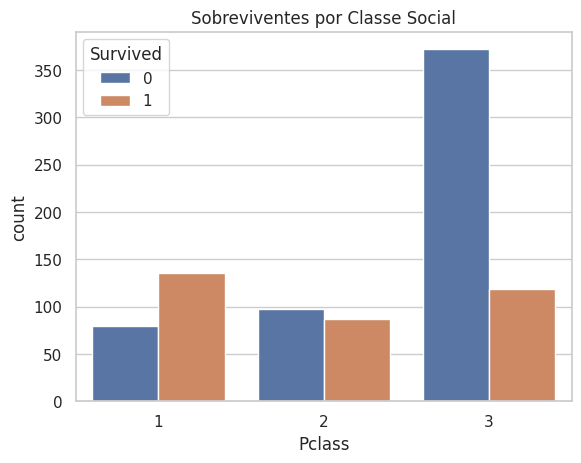

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definindo um estilo visual mais bonito
sns.set_theme(style="whitegrid")

# A classe social influenciou na sobrevivência?
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Sobreviventes por Classe Social')
plt.show()

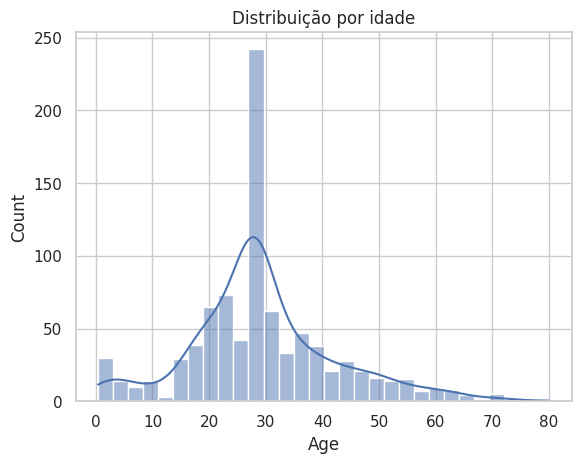

In [29]:
# Qual a distribuição de idade dos passageiros?
sns.histplot(df['Age'], kde=True)
plt.title('Distribuição por idade')
plt.show()